# Data Distributions

In [1]:
set.seed(37)

## Normal distribution

The following are functions dealing with the `normal` distribution.

* `rnorm` samples from the normal distribution
* `pnorm` returns the probability of a sample (`quantile`)
* `qnorm` returns the quantile for a given probability
* `dnorm` returns the density function for an array of values

The `rnorm` function simply samples data points.

In [2]:
s <- rnorm(10, mean=0, sd=1)
print(s)

 [1]  0.1247540  0.3820746  0.5792428 -0.2937481 -0.8283492 -0.3327136
 [7] -0.1921595  1.3629827  0.8559544  0.2159955


The `pnorm` function gives you the cummulative probability up to the specified quantile.

In [3]:
p <- pnorm(c(-1.0, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 1.0), mean=0, sd=1)
print(p)

 [1] 0.1586553 0.3445783 0.3820886 0.4207403 0.4601722 0.5000000 0.5398278
 [8] 0.5792597 0.6179114 0.6554217 0.8413447


The `qnorm` function maps the quantile probability back to the quantile.

In [4]:
q <- qnorm(p, mean=0, sd=1)
print(q)

 [1] -1.0 -0.4 -0.3 -0.2 -0.1  0.0  0.1  0.2  0.3  0.4  1.0


The `dnorm` function gives the probability of the data point.

In [5]:
d <- dnorm(s, mean=0, sd=1)
print(d)

 [1] 0.3958498 0.3708606 0.3373280 0.3820963 0.2830817 0.3774611 0.3916443
 [8] 0.1575835 0.2765766 0.3897438


## Other distributions

There are other distributions besides the normal distribution. They have the corresponding functions as with the normal distribution.

* `r`
* `p`
* `q`
* `d`

| command | distribution |
| --- | --- |
| dbeta | beta |
| dbinom | binomial |
| dcauchy | Cauchy |
| dchisq | chi-squared |
| dexp | exponential |
| df | F distribution |
| dgamma | gamma |
| dgeom | geometric |
| dhyper | hypergeometric |
| dlnorm | log-normal |
| dmultinom | multinomial |
| dnbinom | negative binomial |
| dnorm | normal |
| dpois | Poisson |
| dt | Student’s t |
| dunif | uniform distribution |
| dweibull | Weibull |
| dwilcox | Wilcoxon rank sum |
| ptukey | Studentized range |
| dsignrank | Wilcoxon signed rank |

## Normality test

You may use the `Shapiro-Wilk Test` to test for normality. Below, we sample from a normal distribution and test for normality. Note that the `p-value` is greater than (let's say) 0.05, and so we fail to reject the null hypothesis (there is no difference between the normal distribution and the one observed).

In [6]:
x <- rnorm(1000, m=0, sd=1)
r <- shapiro.test(x)
print(r)


	Shapiro-Wilk normality test

data:  x
W = 0.99869, p-value = 0.6793



Now, we sample from a `Poisson` distribution and apply the normality test. The `p-value` is less than 0.05 and so we reject the null hypothesis in favor the the alternative one (there is a difference between the normal distribution and the one observed).

In [7]:
x <- rpois(1000, lambda=3)
r <- shapiro.test(x)
print(r)


	Shapiro-Wilk normality test

data:  x
W = 0.94566, p-value < 2.2e-16



## Comparing two distributions

We may use the `Kolmogorov-Smirnov Test` (or `KS Test`) to test if two distributions are the same.

In [8]:
x <- rnorm(1000, m=0, sd=1)
y <- rnorm(1000, m=0, sd=1)
r <- ks.test(x, y)
print(r)


	Two-sample Kolmogorov-Smirnov test

data:  x and y
D = 0.032, p-value = 0.6852
alternative hypothesis: two-sided



The `KS Test` may also be called with a probability function. Below, we use `pnorm` to test if the distribution of `x` follows a normal distribution with mean 0 and standard deviation 1.

In [9]:
x <- rnorm(1000, m=0, sd=1)
r <- ks.test(x, 'pnorm', mean=0, sd=1)
print(r)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.02782, p-value = 0.4213
alternative hypothesis: two-sided



Now we compare with a normal distribution with mean 5 and standard deviation 1.

In [10]:
x <- rnorm(1000, m=5, sd=1)
r <- ks.test(x, 'pnorm', mean=0, sd=1)
print(r)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.98743, p-value < 2.2e-16
alternative hypothesis: two-sided



Here, we use `ppois` to test if the distribution of `x` follows a Poisson distribution with lambda 5.

In [11]:
x <- rnorm(1000, m=0, sd=1)
r <- ks.test(x, 'ppois', 5)
print(r)


	One-sample Kolmogorov-Smirnov test

data:  x
D = 0.93457, p-value < 2.2e-16
alternative hypothesis: two-sided



## Quantile-Quantile Plot

The `Quantile-Quantile Plot` (`QQ Plot`) is a visual way to also test for normality. To idea is to see if the data points fall on the straight line.

### qqnorm

The `qqnorm` function provides a way to visually tests if a distribution is normal. Note the use of `qqline` to draw the straight line.

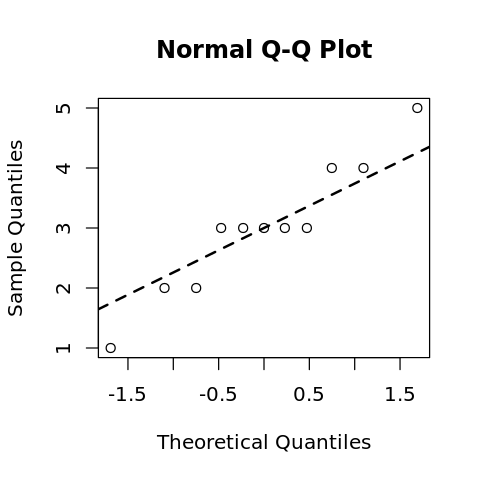

In [12]:
x <- c(1, 2, 2, 3, 3, 3, 3, 3, 4, 4, 5)

options(repr.plot.width=4, repr.plot.height=4)

qqnorm(x)
qqline(x, lwd=2, lty=2)

Here, we sample from a normal distribution and form a `QQ Plot`. Note that the data falls nearly on the straight line.

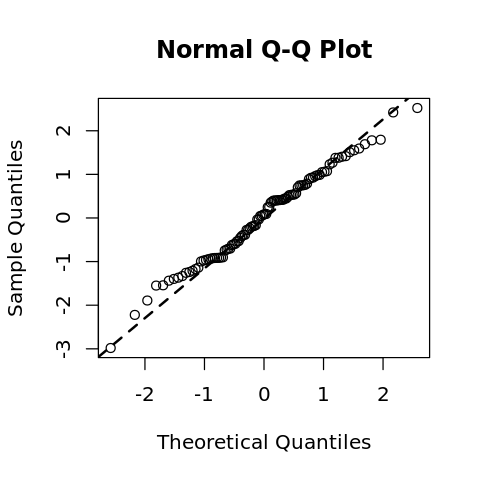

In [13]:
x <- rnorm(100, m=0, sd=1)

options(repr.plot.width=4, repr.plot.height=4)

qqnorm(x)
qqline(x, lwd=2, lty=2)

### qqplot

The `qqplot` function may be used to compare two distributions. Below, we compare the distribution of data coming from a Poisson distribution to that coming from a normal distribution.

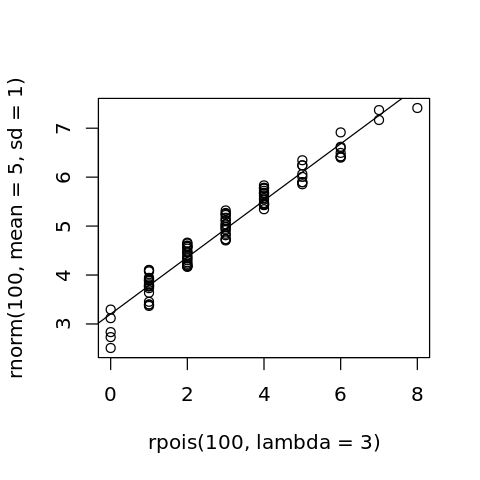

In [14]:
options(repr.plot.width=4, repr.plot.height=4)

p <- qqplot(rpois(100, lambda=3), rnorm(100, mean=5, sd=1))
abline(lm(p$y ~ p$x))

Here, we compare two normal distributions parameterized differently.

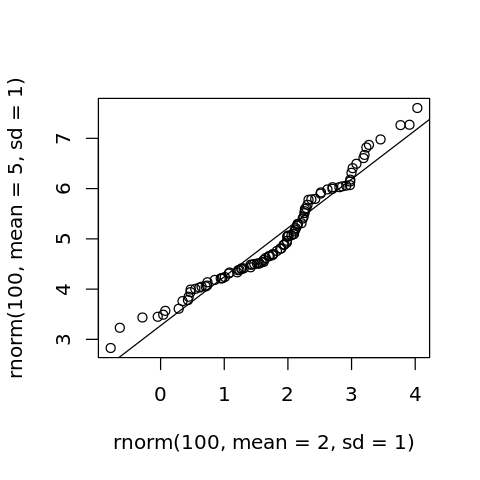

In [15]:
options(repr.plot.width=4, repr.plot.height=4)

p <- qqplot(rnorm(100, mean=2, sd=1), rnorm(100, mean=5, sd=1))
abline(lm(p$y ~ p$x))

Here, we compare two normal distributions parameterized the same.

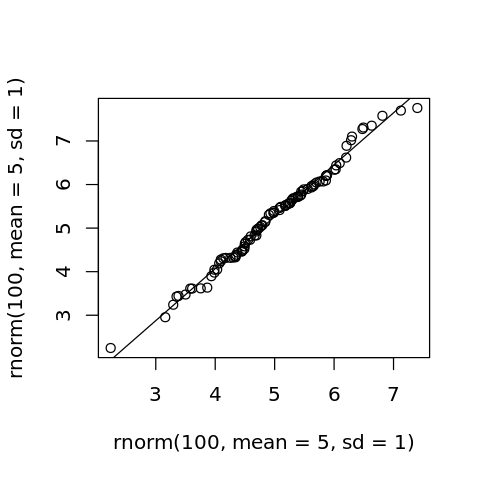

In [16]:
options(repr.plot.width=4, repr.plot.height=4)

p <- qqplot(rnorm(100, mean=5, sd=1), rnorm(100, mean=5, sd=1))
abline(lm(p$y ~ p$x))